# Alvin Nganga

## Research question/interests

## Research question 1: Are distinct elements more or less valuable to music popularity, than a combination of elements? 
To answer this question, we will need to discover trends among the most popular music. We could find that most popular songs have one specific valuable feature, or perhaps we could find that most of them have a few specific elements that commonly contribute to popularity. This could be visualized by graphing the chosen elements in relation to how many top songs they appear in. If multiple elements have high and similar levels of importance, then we can suggest that a combination is needed. In order to remain objective, we must remain open to the possibility that there will be no overarching trends, and the most popular music will display a random spread of relevant characteristics. This could lead us to ask more specific questions for example:

## Research Question 2: Are there musical features that contribute to the popularity of certain genres and not others? 
This would coincide with some of our initial assumptions, specifically that the public holds a diverse range of tastes and thus different people will find different music (and their features) more attractive than others. To test this, we would have to organize our data set further by categorizing songs according to genre, possibly in an additional column, and then looking within each genre for any trends. This would be difficult considering there are 500 songs and we’re not sure if there would be an equal number of songs per genre. But even that could provide useful insights. If there is a genre with specific features that is consistently more popular, then we could imply that those features are more connected to music success.

## Notice: The refined research questions after conducting the EDA are at the bottom of the notebook (with notes). 

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
music = pd.read_csv("../data/raw/song_data.csv.zip")

In [ ]:
music

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
singsong = music.loc[0:500]
# i shortened the dataframe up to 501 rows because we agreed as a group that the previous data set was just too large to work with

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


In [ ]:
singsong.shape

(501, 15)

In [ ]:
singsong.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

# The most variation seems to be in sound duration,loudness and popularity, then key. 

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,63.742515,237338.399202,0.257248,0.574527,0.662737,0.040959,5.063872,0.166569,-7.881453,0.652695,0.068771,122.469357,3.952096,0.589494
std,15.119510,84421.744078,0.270120,0.155271,0.211988,0.133976,3.641965,0.129677,3.821101,0.476590,0.069594,27.685582,0.299501,0.235174
min,4.000000,120173.000000,0.000007,0.149000,0.040400,0.000000,0.000000,0.021500,-26.401000,0.000000,0.023600,70.859000,1.000000,0.032900
25%,58.000000,193373.000000,0.022900,0.465000,0.515000,0.000000,2.000000,0.085700,-9.961000,0.000000,0.033800,100.024000,4.000000,0.410000
50%,67.000000,220826.000000,0.154000,0.579000,0.700000,0.000044,5.000000,0.118000,-7.024000,1.000000,0.047100,121.700000,4.000000,0.609000
75%,74.000000,261546.000000,0.407000,0.680000,0.831000,0.002650,9.000000,0.211000,-4.932000,1.000000,0.073200,139.998000,4.000000,0.784000
max,98.000000,1233666.000000,0.953000,0.967000,0.988000,0.949000,11.000000,0.952000,-1.357000,1.000000,0.891000,201.583000,5.000000,0.973000


In [ ]:
singsong_cleaned = singsong.copy().drop(['audio_mode','liveness'], axis=1)

#removed audio mode as it has very limited range. Most of the songs are so close in this measure that variation wouldn't be a impactful factor like some of the others.
#I removed liveness because we're trying to evaluate the music itself and not external factors like where it was performed, also many songs were likely performed live and recorded which could obsure interpretation.

## Unknown Variables

### These are the variables I didn't previously understand, or recognise everything they entail. As part of this EDA I conducted research and found the following definitions:

Audio Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Speechiness: detects the presence of spoken words in music.

Time Signature: an indication of rhythm following a clef, generally expressed as a fraction with the denominator defining the beat as a division of a whole note and the numerator giving the number of beats in each bar.

In [ ]:
singsong_cleaned_1 = singsong_cleaned.dropna(axis=0)
singsong_cleaned_1.shape
#This is to ensure there are no missing data points

(501, 13)

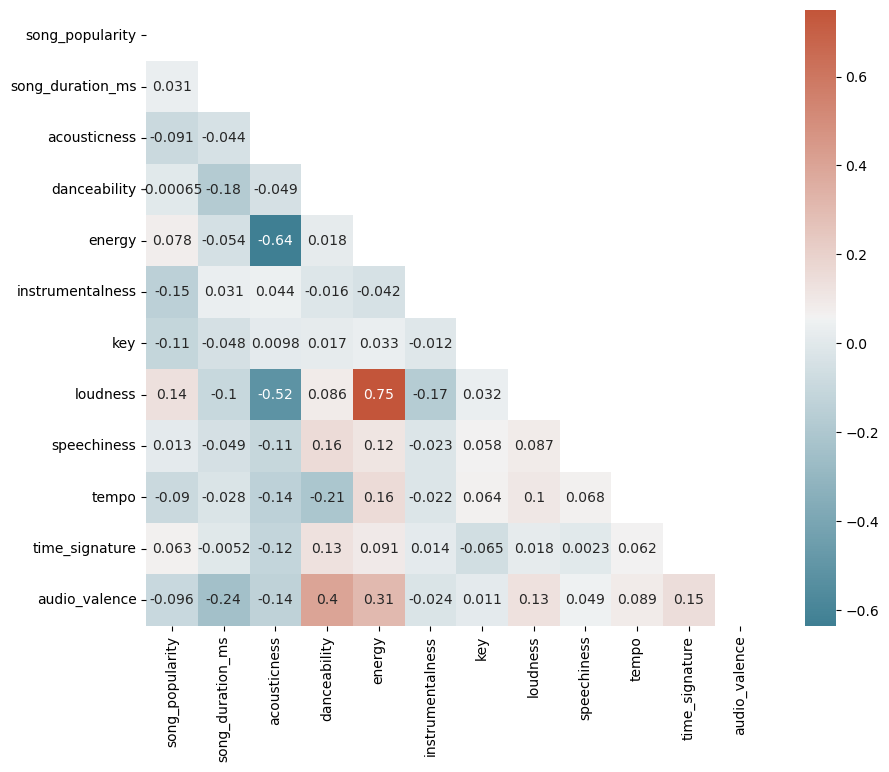

In [ ]:
corr = singsong_cleaned.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            mask=mask)
plt.yticks(rotation=0)
plt.show()

# Brief Analysis of Correlation Plot

This correlation plot shows that a majority of the factors have a relatively weak correlation. Only three correlations are above 0.5 (positive and negative). These are 1. loudness and acousticness: -0.52, 2. energy and acousticness: -0.64, and 3. loudness and energy: 0.75. The most significant of these is loudness and energy with a correlation of 0.75. Using reasoning we can understand that a louder song would be deemed to have more energy. An important observation is that no individual factor has even a moderately strong correlation with the song popularity rating. The strongest correlations to popularity are with instrumentalness (-0.15), key(-0.11) and loudness (0.14). Looking back at my first research question at the top of the notebook, it appears that individual factors don't greatly impact popularity, pointing us to inspect perhaps a combination of factors as contributing to popularity. We see that most factors don't correlate strongly, but perhaps some of the ones that correlate more will lead to some interesting findings. 

### Next I will make plots to inspect the three categories with the strongest correlation to popularity

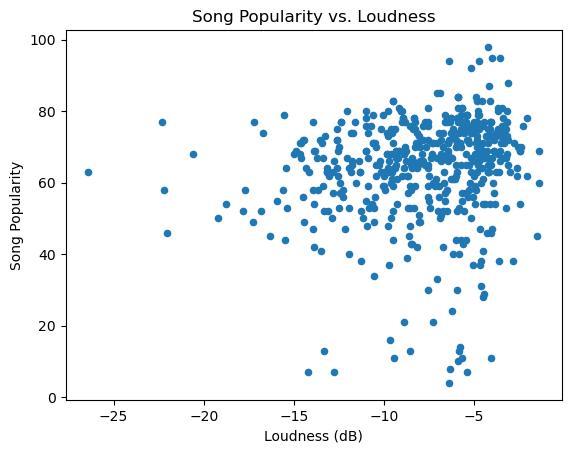

In [ ]:
singsong_cleaned.plot(kind='scatter', x='loudness', y='song_popularity')
plt.title('Song Popularity vs. Loudness')
plt.xlabel('Loudness (dB)')
plt.ylabel('Song Popularity')
plt.show()

### Brief Analysis:

This scatterplot shows that there isn't a great correlation between song popularity and loudness. While there are louder songs that are popular there are also quiet songs that are popular. However, I will note that it mostly clustered, meaning most of the data is in the same area. The conclusion this bringsus to is that most of the songs are both loud and popular. But can there be causation without correlation? Is it possible that loudness is linked to popularity even though they don't correlate? Maybe the songs that are not loud and also popular have other factors that contribute to their popularity, and thus while they obscure the correlation of loudness and popularity, they do't necessarily disprove it. This highlights the necessity of evaluating a combination of factors.  

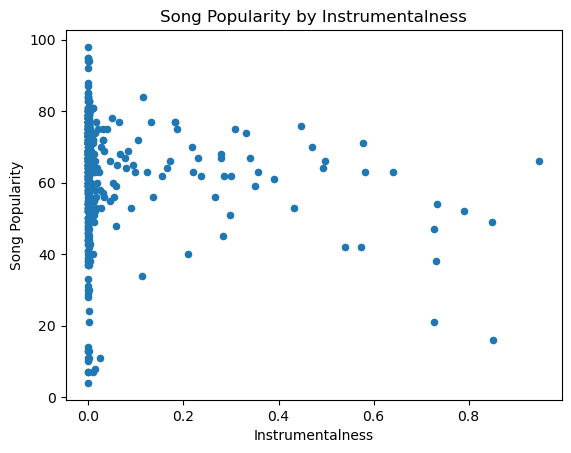

In [ ]:
singsong_cleaned.plot(kind='scatter', x='instrumentalness', y='song_popularity')
plt.title('Song Popularity by Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Song Popularity')
plt.show()

### Brief Analysis:

This scatterplot shows that almost all the songs are not instrumental. Among these non instrumental songs, there is a huge range of popularity. This suggests that there are other factors that are influential in controlling their success. This idea is bolstered by the fact that the songs with relevant instrumental ratings are also similarly popular at different levels of instrumentals, showing little correlation between instrumentalness and popularity.  

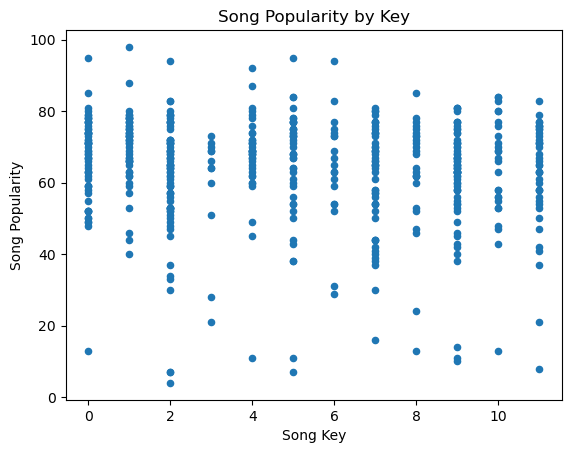

In [ ]:
singsong_cleaned.plot(kind='scatter', x='key', y='song_popularity')
plt.title('Song Popularity by Key')
plt.xlabel('Song Key')
plt.ylabel('Song Popularity')
plt.show()


### Brief Analysis:

This scatter plot shows that key really has no correlation to popularity with various keys all having similar ranges of song popularity, from the min to the max. The key of around 1 does seem to have the lowest minimum but shows the same trend as all the others. 

In [ ]:
top_10_songs = singsong_cleaned.sort_values('song_popularity', ascending=False).head(10)

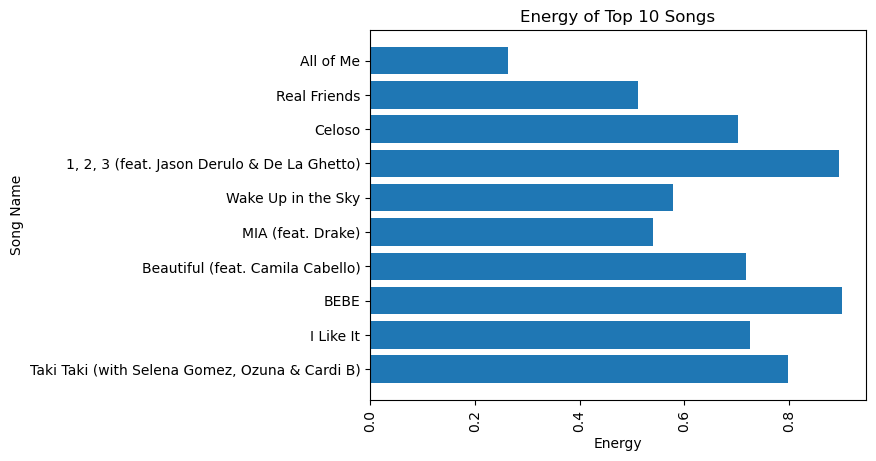

In [ ]:
plt.barh(top_10_songs['song_name'], top_10_songs['energy'].values)
plt.xticks(rotation=90)
plt.ylabel('Song Name')
plt.xlabel('Energy')
plt.title('Energy of Top 10 Songs')

plt.show()

### Brief Analysis:

Looking at energy, which had a large correlation with loudness (one of the factors with a higher correlation to popularity than the others), there is a noteable trend. Out of the top 10 popular songs in our dataframe, all but one have an energy level greater than 0.5 on a scale of 0-1. It then seems that although we could say the same for less popular songs, popular songs have high energy. Now it is important to see if its interaction with other factors can lead us to find what really contributes to popularity. 

## Refined Research questions

## Research question 1: Is there a combination of elements that is only prevalent amongst the most popular songs?
The final visualization in my EDA shows that with regards to an element like energy, the most popular songs have high ratings. Still we know that because of the low correlation between energy and popularity, having a high energy rating alone is not enough to cause high popularity (some of the less popular songs also have high energy). Then it is possible that we should look for a specific combination of elements. While most elements dont have such strong correlations to each other, there are others which are stronger than the rest. Looking at these for insights could prove useful. Perhaps there are different possible combinations that lead to popularity. To test this I will need to materialise the combinations by making new columns. I could start with energy and loudness, the two most correlated elements. Adding a column that adds these two factors, and then making visualisations to test the correlation of this combination with popularity and/or other elements is a good first step.   

## Research Question 2: Are there musical features that contribute to the popularity of certain genres and not others?
### Supporting question: What genres appear most in the most popular and least popular songs respectively?
My initial second research question asked if there are musical features that contribute to the popularity of certain genres and not others. If this were the case, I would've found high correlation between different musical factors and popularity, but as I've discussed, none of the factors (alone) truly had a signifcant relationship with song popularity. Perhaps then there are combinations of elements that would be valuable to different genres. However, it would be helpful to first answer the first question, to see whether there are any impactful combinations at all before assigning them to genre. Thus, the subquestion I've noted is a place to look even before question one has been answered. Categorizing the entire dataframe for genre may be laborious, whereas just looking at the most and least popular songs (perhaps also a range from medium-popular songs) can give an idea if there's any trends worth looking into further. To do this I could print different versions of the dataframe containing 10 or so songs of similar popularity, using the head() function. For these songs i'd also add a column stating the genre, to allow us to see trends and make visualisations between genre and the different charactersitics. 

# Function Import : Cleaning, Wrangling, Processing

### This function is the result of all the cleaning, wrangling, processing that was done. I did functions to delete duplicates, add rows, drop certain columns and make a final processed dataframed called combo_df. This work included making method chains, and wrapping them in separate functions. I then combined these functions into one funciton in the code directory and I have called this function below. For a breakdown of how this funciton was done in separate steps before, check the ungraded folder. 

### Essentially the function does the following:
- Loads data into dataframe
- Drops irrelevant columns
- Creates combo dataframe using method chaining (Combo includes top 20 songs, bottom 20 and middle 10)
- Drops duplicates and adds genre column with a genre for each song
- Finally reindexes the columns so that genre is second

In [ ]:
from Scripts import project_functions1
combo_df = project_functions1.load_and_process("../data/raw/song_data.csv.zip")
combo_df

,song_name,genre,song_popularity,song_duration_ms,acousticness,danceability,energy,key,loudness,speechiness,tempo,audio_valence,loudness_energy,energy_duration
10479,Forastero,rock,0,267687,0.212000,0.591,0.826,9,-5.899,0.2430,173.823,0.8430,NaN,NaN
3883,Cerca del Mar,rock,0,180013,0.950000,0.531,0.296,5,-13.464,0.0330,92.335,0.6770,NaN,NaN
9970,Higher,rock,0,218275,0.441000,0.660,0.557,0,-7.467,0.2630,115.773,0.3190,NaN,NaN
18549,1435,rock,0,292373,0.061600,0.580,0.353,0,-9.295,0.0265,141.987,0.2420,NaN,NaN
15243,With Every Heartbeat,rock,0,197000,0.011700,0.707,0.692,4,-5.584,0.0290,120.018,0.2230,NaN,NaN
4043,John Madden 2,rock,0,153191,0.226000,0.871,0.648,11,-5.886,0.3000,94.023,0.4090,NaN,NaN
18566,Details,rock,0,229200,0.099200,0.643,0.906,2,-6.246,0.0539,134.988,0.5590,NaN,NaN
18562,Swing,rock,0,183866,0.002070,0.456,0.687,4,-6.508,0.0354,168.129,0.5500,NaN,NaN
12746,Red Bentley (feat. Young Thug),pop,0,207866,0.030100,0.903,0.609,10,-7.555,0.2370,149.991,0.2680,NaN,NaN
12737,Get Dripped (feat. Playboi Carti),pop,0,158769,0.098700,0.955,0.492,8,-8.444,0.3950,130.062,0.9040,NaN,NaN


# Analysis

In [ ]:
# Grouping the dataframe by genre and calculate the mean of song popularity for each group
genre_popularity = combo_2.groupby('genre')['song_popularity'].mean()

NameError: name 'combo_2' is not defined

In [ ]:
# Grouping by genre and calculate mean of song popularity
grouped = combo_2.groupby('genre')['song_popularity'].mean().reset_index()


plt.barh(y=grouped['genre'], width=grouped['song_popularity'])
plt.xlabel('Mean Song Popularity')
plt.ylabel('Genre')
plt.title('Mean Song Popularity by Genre')
plt.show()

### Bar Chart Analysis

#### While it would appear that soft rock, pop rock and new wave are the most popular genres, the context gives us a more complex reality. Rock which has one of the lower average song popularities, is the most prevalent genre within the 17/42 songs in the combo dataframe. Because rock has the largest share it is more likely to have a wider range of popularity and thus have a medium-low average score. In contrast, there is only one new wave song, one soft rock and one grunge. Thus while they do have the highest average scores,they don't appear enough within the sample to suggest that they are the most popular genres. It then seems that what I'm looking for is a genre that both appears a significant amount of times in the combination list and has a high average score for popularity. Pop, Hip hop and hard rock are the only other genres with significant prevalence, showing up 11, 4 and 3 times respectively. Seeing as we didn't control how many of each genre are in the data, it is most productive for us to simply judge each genre based on the available sample size and the distribution it shows. This currently places pop, hip hop and hard rock as the most popular in ascending order, with mean scores of 56.2, 72.5 and 75.6.It also highlights to me that before answering the bigger questions I made in analysis 1, I needed to answer the question: which genre(s) is(are) most popular? 

In [ ]:
# Filter the dataframe to only include the selected genres
#The filtering is because the other genres don't have enough data points to contribute significant information.

# Filter the dataframe to include only the desired genres
genres = ['rock', 'pop', 'hip hop', 'hard rock']
singsong_filtered = combo_2[combo_2['genre'].isin(genres)]

# Create the violin plot
sns.violinplot(x='genre', y='song_popularity', data=singsong_filtered)
plt.title("Song Popularity by Genre")
plt.ylabel('Song Popularity')
plt.xlabel('Genre')

### Violin Plot Analysis

#### This violin plot isolated the most significant genres from the bar chart to give a more focused insight. In particular these are the highest scoring genres with no less than 3 entries in the combo dataframe. This violin chart affirms my conclusions from the bar chart. Looking at the section of high scores in each genre, hip hop and hard rock have narrow distributions (because of the lower prevalence than pop and rock) but still have high density for high popularity. Because there are many more pop songs than hip hop and hard rock, I'd suggest that the conclusion that pop songs are the most popular is more robust than hip hop and rock generals. The two most common genres are rock and pop, and pop has a higher mean popularity and a larger density of higher popular songs than low popular songs.

### Pair Plot

In [ ]:
genres = ['rock', 'pop', 'hip hop', 'hard rock']
singsong_filtered = combo_2[combo_2['genre'].isin(genres)]
sns.pairplot(singsong_filtered, x_vars=['acousticness', 'danceability', 'energy', 'loudness', 'speechiness', 'tempo', 'audio_valence', 'loudness_energy', 'energy_duration'], y_vars=['song_popularity'], hue='genre', height=3)

plt.show()

### Pair Plot Analysis

#### This plot is the most useful for answering the two research questions I made at the end of my EDA in Milestone 2. It is slightly hard to read because there are 9 factors being inspected, but one can zoom in and focus on one chart at a time. The approach I took to anaylising how the different genres interact with these different factors was to look at both distribution and quantity, similarly to the previous two charts. Rock songs which are the most prevant seem to also have the least noticeable trend. For each factor, apart from loudness and acoustincness (danceability, energy, speechiness, temp, audio valence, loudness_energy and energy duration), rock and pop songs are distributed widely, having both high and low ratings in these factors and popularity across the board. In contrast hip hop and hard rock  seem to cluster in more of these categories. For acousticness, the hard rock songs all have below average acousticness but are still popular, implying that this factor isn't impactful in their popularity. For loudness however, all hard rock and hip hop songs have above average scores and are highly popular, signifying that they are popular because of the factor of loudness. Loudness and energy seem to have similar impact in the popularity of pop songs. 

#### Therefore, it can be said that thus far I know that hard rock, hip hop and pop songs are the most popuar within my chosen sample size. The factors that most influence their popularity seem to be loudness and energy. The impact of loudness and energy is strengthened by the fact that the combined loundness_energy scores for these two genres are high along with their popularity. 

In [ ]:
combo_2.to_csv('combo_2.csv', index=False)